In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:


!wget -O Player_Stats.xlsx "https://github.com/JeffYu12/Group-Project-/raw/main/Player%20Stats.xlsx"

data = pd.read_excel("Player_Stats.xlsx", sheet_name = None)

--2024-11-19 16:45:05--  https://github.com/JeffYu12/Group-Project-/raw/main/Player%20Stats.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffYu12/Group-Project-/main/Player%20Stats.xlsx [following]
--2024-11-19 16:45:05--  https://raw.githubusercontent.com/JeffYu12/Group-Project-/main/Player%20Stats.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57443 (56K) [application/octet-stream]
Saving to: ‘Player_Stats.xlsx’

Player_Stats.xlsx   100%[===================>]  56.10K  --.-KB/s    in 0.008s  

2024-11-19 16:45:06 (6.83 MB/s) - ‘Player_Stats.xlsx’ saved [57443/57443]



In [5]:
data.items()

dict_items([('Player Stats 22-23',                       Name  GP    GS   MIN    PTS   OR    DR   REB   AST  STL  \
0          Jayson Tatum SF  74  74.0  36.9   30.1  1.1   7.7   8.8   4.6  1.1   
1          Jaylen Brown SG  67  67.0  35.9   26.6  1.2   5.7   6.9   3.5  1.1   
2       Malcolm Brogdon PG  67   0.0  26.0   14.9  0.6   3.6   4.2   3.7  0.7   
3         Derrick White PG  82  70.0  28.3   12.4  0.6   2.9   3.6   3.9  0.7   
4          Marcus Smart PG  61  61.0  32.1   11.5  0.8   2.4   3.1   6.3  1.5   
5             Al Horford C  63  63.0  30.5    9.8  1.2   5.0   6.2   3.0  0.5   
6        Grant Williams PF  79  23.0  25.9    8.1  1.1   3.5   4.6   1.7  0.5   
7    Robert Williams III C  35  20.0  23.5    8.0  3.0   5.4   8.3   1.4  0.6   
8            Sam Hauser SF  80   8.0  16.1    6.4  0.4   2.1   2.6   0.9  0.4   
9         Mike Muscala C *  20   4.0  16.2    5.9  0.7   2.7   3.4   0.6  0.2   
10     Payton Pritchard PG  48   3.0  13.4    5.6  0.5   1.3   1.8   1.3  

In [6]:
#print(data)

In [7]:
data['Player Stats 22-23']

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO
0,Jayson Tatum SF,74,74.0,36.9,30.1,1.1,7.7,8.8,4.6,1.1,0.7,2.9,2.2,1.6
1,Jaylen Brown SG,67,67.0,35.9,26.6,1.2,5.7,6.9,3.5,1.1,0.4,2.9,2.6,1.2
2,Malcolm Brogdon PG,67,0.0,26.0,14.9,0.6,3.6,4.2,3.7,0.7,0.3,1.5,1.6,2.5
3,Derrick White PG,82,70.0,28.3,12.4,0.6,2.9,3.6,3.9,0.7,0.9,1.2,2.2,3.4
4,Marcus Smart PG,61,61.0,32.1,11.5,0.8,2.4,3.1,6.3,1.5,0.4,2.3,2.8,2.7
5,Al Horford C,63,63.0,30.5,9.8,1.2,5.0,6.2,3.0,0.5,1.0,0.6,1.9,5.1
6,Grant Williams PF,79,23.0,25.9,8.1,1.1,3.5,4.6,1.7,0.5,0.4,1.0,2.4,1.6
7,Robert Williams III C,35,20.0,23.5,8.0,3.0,5.4,8.3,1.4,0.6,1.4,1.0,1.9,1.5
8,Sam Hauser SF,80,8.0,16.1,6.4,0.4,2.1,2.6,0.9,0.4,0.3,0.4,1.2,2.4
9,Mike Muscala C *,20,4.0,16.2,5.9,0.7,2.7,3.4,0.6,0.2,0.3,0.5,1.4,1.3


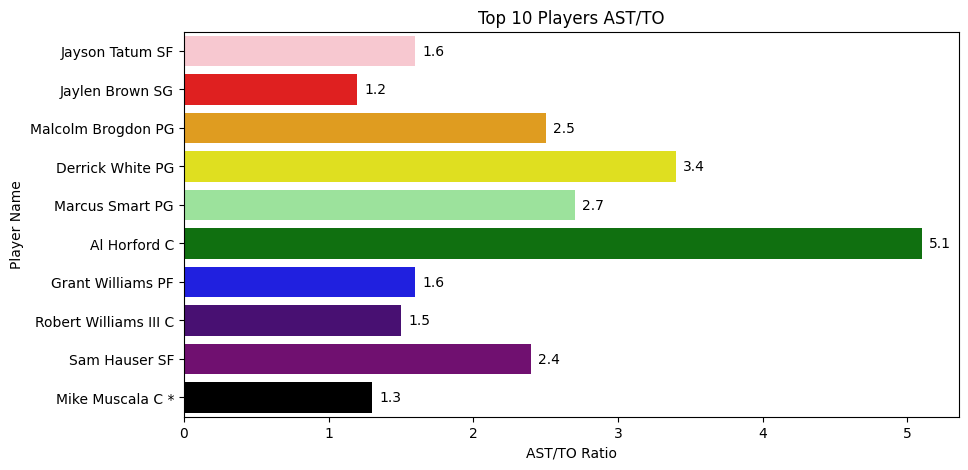

In [12]:
df = pd.read_excel('Player_Stats.xlsx', sheet_name='Player Stats 22-23')
top_10_df = df[['Name', 'AST/TO']].head(10)

#rounds ast/to to one decimal place
top_10_df['AST/TO'] = top_10_df['AST/TO'].round(1)

#establishing the colors
colors = ['pink', 'red', 'orange', 'yellow', 'lightgreen', 'green', 'blue', 'indigo', 'purple', 'black']

#graph
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_10_df, y='Name', x='AST/TO', hue='Name', dodge=False, palette=colors, legend=False)
plt.title('Top 10 Players AST/TO')
plt.xlabel('AST/TO Ratio')
plt.ylabel('Player Name')

#printing the value next to the bar
for i, (name, ratio) in enumerate(zip(top_10_df['Name'], top_10_df['AST/TO'])):
    ax.text(ratio + 0.05, i, f"{ratio:.1f}", va='center')

plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:354: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


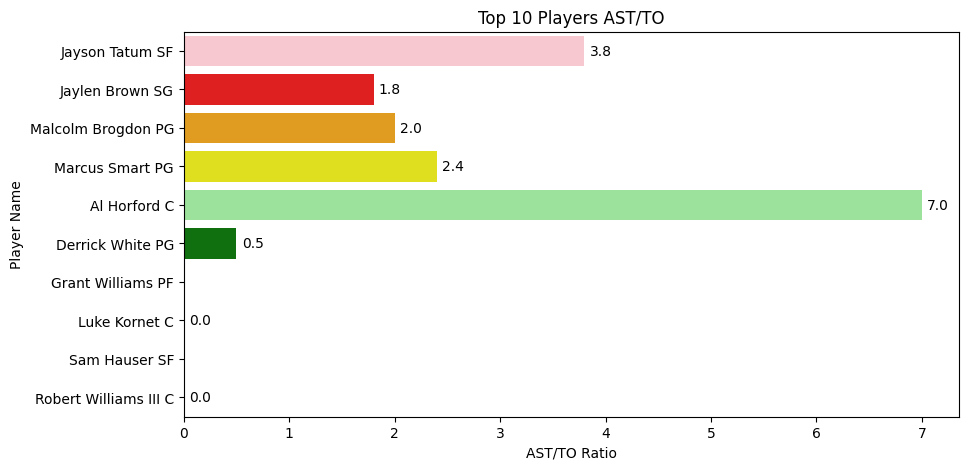

In [13]:
df = pd.read_excel('Player_Stats.xlsx', sheet_name='Player 22-23 vs Mavs')
top_10_df = df[['Name', 'AST/TO']].head(10)

#rounds ast/to to one decimal place
top_10_df['AST/TO'] = top_10_df['AST/TO'].round(1)

#establishing the colors
colors = ['pink', 'red', 'orange', 'yellow', 'lightgreen', 'green', 'blue', 'indigo', 'purple', 'black']

#graph
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_10_df, y='Name', x='AST/TO', hue='Name', dodge=False, palette=colors, legend=False)
plt.title('Top 10 Players AST/TO')
plt.xlabel('AST/TO Ratio')
plt.ylabel('Player Name')

#printing the value next to the bar
for i, (name, ratio) in enumerate(zip(top_10_df['Name'], top_10_df['AST/TO'])):
    ax.text(ratio + 0.05, i, f"{ratio:.1f}", va='center')

plt.show()